In [2]:
#All library imports

import numpy as np

import sympy as sp

import warnings

import pandas as pd

import astropy as ast
from astropy.io import fits
from astropy.wcs import WCS
#pyfits manipulates FITS files

import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #Colours bars etc.
    #mp.rc_file("../../templates/matplotlibrc")
#rc calls the objects you're going to be plotting
mp.rc('xtick', labelsize=20) #xtick is the size of the ticks on the x-axis     
mp.rc('ytick', labelsize=20)
TitleFont = 30 #Title font size
AxisFont = 25

In [3]:
from astropy.utils.data import download_file

In [4]:
cl_im = fits.open("C:/Users/Rick/Desktop/Chapman_Stuff/spt0348/band3/spt0348_band3_clean1000_cont.fits") #Clean image "slice"
dat_cu = fits.open("C:/Users/Rick/Desktop/Chapman_Stuff/spt0348/band3/spt0348_band3_spw0_clean1000_contsub_spw0_2sig.fits") #Data cube

In [5]:
cl_im.info() #Prints out what the FITS file contains

img_dat = cl_im[0].data #Storing the data as a 2D numpy array
#Image info is generally stored in the 'PRIMARY' block

#What are the image dimensions? Look at the array shape
print(type(img_dat))
print(img_dat.shape)

Filename: C:/Users/Rick/Desktop/Chapman_Stuff/spt0348_band3_clean1000_cont.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     810   (896, 896, 1, 1)   float32   
<class 'numpy.ndarray'>
(1, 1, 896, 896)


In [6]:
#Closing the FITS file; everything we need is stored in img_dat
cl_im.close()

In [7]:
###SHORTCUT###
#(Use fits.getdata if you don't need to examine the FITS header)
    #img_dat_shrtct = fits.getdata("C:/Users/Rick/Desktop/Chapman_Stuff/spt0348_band3_clean1000_cont.fits")
    #print(type(img_dat_shrtct))
    #print(img_dat_shrtct.shape)
###SHORTCUT###

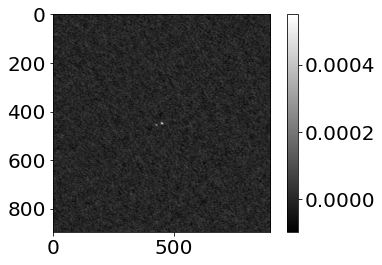

In [8]:
#Viewing the image data and getting basic stats

img_dat_crop = img_dat[:][:][0][0] #':' for calling everything in that part of the array, [0] for calling a 1D cell
plt.imshow(img_dat_crop, cmap='gray')
plt.colorbar()

In [9]:
len(img_dat_crop[:][:])

896

In [10]:
#Now, find the max intensity for this light source and the coordinates for it

maximum = np.nanmax(img_dat_crop)

print("Maximum intensity of the light source: " , maximum) #Maximum intensity of the light source

Maximum intensity of the light source:  0.0005495345


In [11]:
max_coord = np.where(img_dat_crop == np.amax(img_dat_crop))

print("Returned tuple of arrays: " , max_coord)
print("List of indices of maximum element: %i,%i"  %(max_coord[0],max_coord[1]))

Returned tuple of arrays:  (array([449], dtype=int64), array([448], dtype=int64))
List of indices of maximum element: 449,448


In [12]:
#Therefore, the coordinates of the maximum value are (449,448)
print("Maximum intensity at (449,448) is: ")
img_dat_crop[449][448]

Maximum intensity at (449,448) is: 


0.0005495345

### Next steps

- Open the data cube and get the spectrum from that pixel.
- Extract the spectrum data as an array (or a Spectrum1D object) for later analysis.

In [13]:
#Info about the data cube

dat_cu.info()
print(type(dat_cu))

Filename: C:/Users/Rick/Desktop/Chapman_Stuff/spt0348_band3_spw0_clean1000_contsub_spw0_2sig.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     651   (896, 896, 128, 1)   float32   
<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [14]:
def getFitsDat(filename):
    hdus = fits.open(filename) #Everything from dat_cu
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        
        hdu = hdus[0] #The image
        header = hdu.header
        data = hdu.data #Data from the cube
        wcs = WCS(hdu.header) #Puts header in World Coordinates
    return (hdus, hdu, header, data, wcs)

In [15]:
dat_cu_all, img, header_data, cube_data, header_wcs = getFitsDat("C:/Users/Rick/Desktop/Chapman_Stuff/spt0348/band3/spt0348_band3_spw0_clean1000_contsub_spw0_2sig.fits")

In [16]:
spec_data = np.zeros(128)
for i in range(128):
    spec_data[i] = cube_data[0][i][449][448]

In [17]:
Pandas_spec_data = pd.DataFrame({'Spec':spec_data}) #DataFrame = Pandas data frame

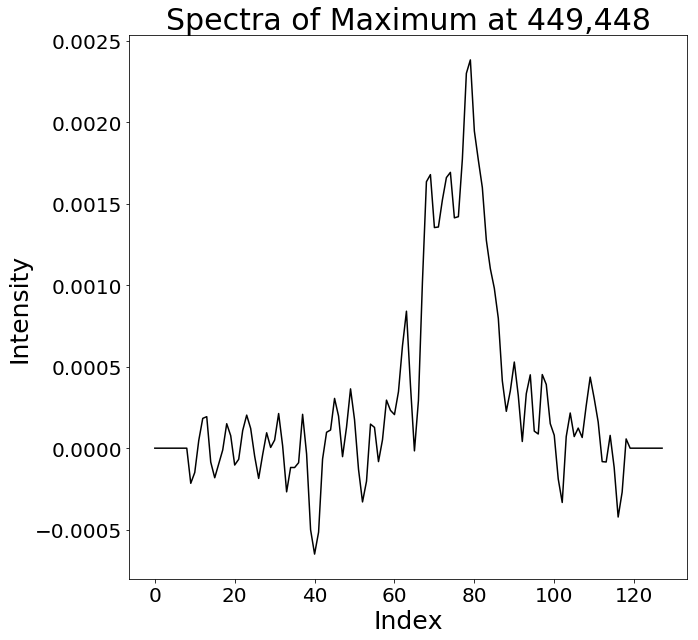

In [19]:
#Plotting the spectrum

f1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 10))

ax1.set_title('Spectra of Maximum at 449,448', fontsize=30)
ax1.set_ylabel('Intensity', fontsize=25)
ax1.set_xlabel('Index', fontsize=25)

ax1.plot(Pandas_spec_data.Spec, color = 'k')
f1.savefig("spt0348_spectra2.pdf")

In [23]:
#Saving the spectral data to a text file

with open('spt0348_specdata.txt', 'w') as file: #w allows us to write to this file, + creates it if not already there
    for item in spec_data:
        file.write("%s\n" % item)